Unit 20.3 Apply your storytelling
The data set is Adult Income: https://www.kaggle.com/wenruliu/adult-income-dataset
The purpose of this project is to create a Income Statistical Model

Introduction

There are many factors affect the income levels. To better predict the income, a statistical model will be setup. The input of the models are the factors to affect income. The output of the model will be whether the people will recieve annual salary $50K or not. The correctness of model will be evaluated by acurracy scores

In [1]:
# import package
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [2]:
# import income data
df_income_raw=pd.read_csv("C:\\Users\\mohua\\OneDrive\\Documents\\unit203\\adult_income\\adult.csv")
df_income_raw.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


The data has been successfully imported. Now we need to work on the data wrangling
1. rows and column - 48842 rows and 15 columns
2. column names - age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week', native-country,income
3. data type in each column - 9 object and 6 integers
4. missing values - raw data did not find the missing values

In [3]:
# data shape
df_income_raw.shape

(48842, 15)

In [4]:
# column names
df_income_raw.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
# data type in each column
df_income_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# check for missing values
df_income_raw.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# assign the raw data to the raw process data and replace '-' with '_' in the column head
df_income=df_income_raw
df_income = df_income.rename({'educational-num': 'educational_num', 'marital-status': 'marital_status','capital-gain': 'capital_gain', 'capital-loss': 'capital_loss','hours-per-week':'hours_per_week','native-country':'native_country'}, axis=1)

However, we found that there is '?' mark in the table. The presence of '?' will not help to put the data in the model. Therefore we have to deal with  '?' first. To achieve this, we need find the unique data of individual column and then assign the ? to NA

There are 9 objects, which are the categorical attributes. The details of these categorical attributes are shown below:
1. workclass -  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov' 'Self-emp-inc' 'Without-pay' 'Never-worked']
2. education- ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school' '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th''12th' '1st-4th' 'Preschool']
3. marital status - ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated''Married-spouse-absent' 'Married-AF-spouse']
4. occupation - occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?' 'Other-service' 'Prof-specialty''Craft-repair' 'Adm-clerical' 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv''Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
5. relationship -['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
6. race- ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
7. gender- ['Male' 'Female']
8.native_country-['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic' 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador' 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia' 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago' 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
9.income ['<=50K' '>50K']

In [8]:
# Find the unique value of individual column and start to organize data
print('workclass',df_income.workclass.unique())
print('eduction',df_income.education.unique())
print('maritial status',df_income.marital_status.unique())
print('occupation',df_income.occupation.unique())
print('relationship',df_income.relationship.unique())
print('race',df_income.race.unique())
print('gender',df_income.gender.unique())
print('native_country',df_income.native_country.unique())
print('income',df_income.income.unique())

workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
eduction ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
maritial status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
relationship ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native_country ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 

From the unique, we can see that gender can only be either male and female. The income can only be <=50K and > 50 K. If we will use income as output of model, it will be a good model like DecisionTree. As initial trial, we will explore features of the data. If income<=50K, Then income=0, Otherwise income=1, Also we can assign gender female=0, Male=1

In [9]:
# Assign income
df_income.income[df_income.income=='<=50K']= 0
df_income.income[df_income.income=='>50K']= 1
df_income['income']=pd.to_numeric(df_income['income'])
income=df_income.income
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational_num  48842 non-null  int64 
 5   marital_status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital_gain     48842 non-null  int64 
 11  capital_loss     48842 non-null  int64 
 12  hours_per_week   48842 non-null  int64 
 13  native_country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
df_income=df_income.drop(['fnlwgt', 'education', 'occupation','relationship','capital_gain','capital_loss','native_country','race'], axis=1)

In [11]:
df_income.head(100)

,age,workclass,educational_num,marital_status,gender,hours_per_week,income
0,25,Private,7,Never-married,Male,40,0
1,38,Private,9,Married-civ-spouse,Male,50,0
2,28,Local-gov,12,Married-civ-spouse,Male,40,1
3,44,Private,10,Married-civ-spouse,Male,40,1
4,18,?,10,Never-married,Female,30,0
...,...,...,...,...,...,...,...
95,20,Private,9,Never-married,Male,40,0
96,25,Private,13,Never-married,Female,40,0
97,49,Private,6,Married-civ-spouse,Male,40,0
98,59,Private,9,Married-civ-spouse,Male,40,1


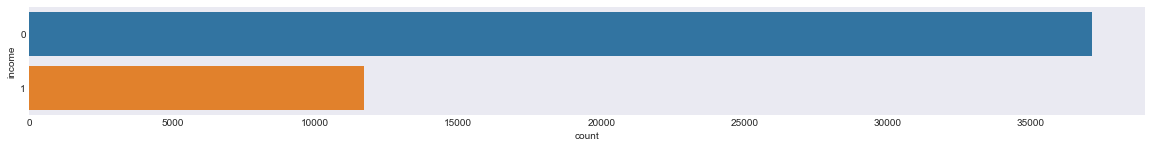

In [12]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-dark')
sns.countplot(y="income", data=df_income)

Sample collection is biased because it seems like that there are more samples in the low income (<=50K) than high income (> 50K). Now let's do the detail analysis on the distribution of people in the high income group (>50K) and low income group (<=50K). What we will see are the individual feature in each income group.

The first one is to organize the marital_status. There are Never-married, Married-civ-spouse, Widowed, Divorced, Separated, Married-spouse-absent,Married-AF-spouse. If you are looking at it, there are actually three categories: 
Single - By him / herself, this type of people doesn't need to support others, such as Widowed and Never-married
Married - With a family. This type of people needs to support family memebers, such as Married-civ-spouse,Married-spouse-absent,Married-AF-spouse
Separated- With some types of liability, but mostly to support himself /herself, such as Divorced,Separated

The separation in the whole income group is shown below:

In [13]:
df_income.marital_status[df_income.marital_status=='Married-civ-spouse']='Married'
df_income.marital_status[df_income.marital_status=='Married-AF-spouse']='Married'
df_income.marital_status[df_income.marital_status=='Married-spouse-absent']='Married'
df_income.marital_status[df_income.marital_status=='Never-married']='Single'
df_income.marital_status[df_income.marital_status=='Widowed']='Single'
df_income.marital_status[df_income.marital_status=='Divorced']='Separated'
df_income.marital_status.unique()

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

array(['Single', 'Married', 'Separated'], dtype=object)

Now let's look at the income group with maritial status by seaborn

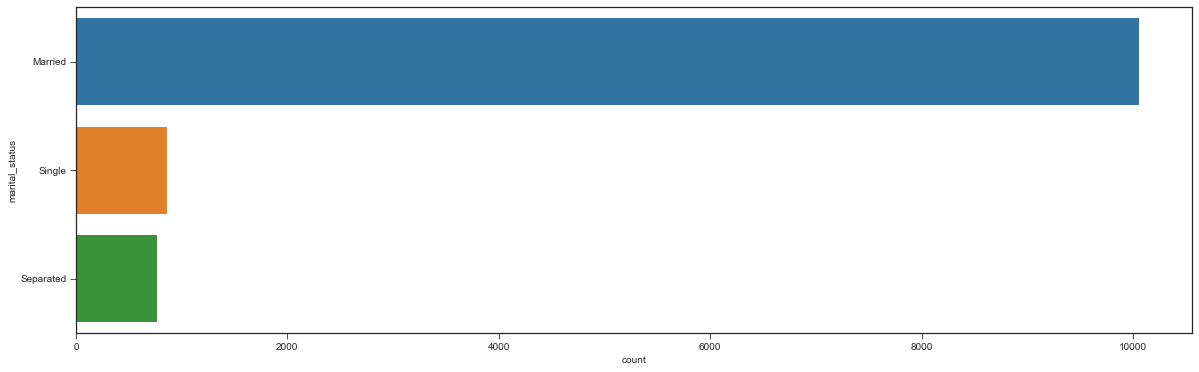

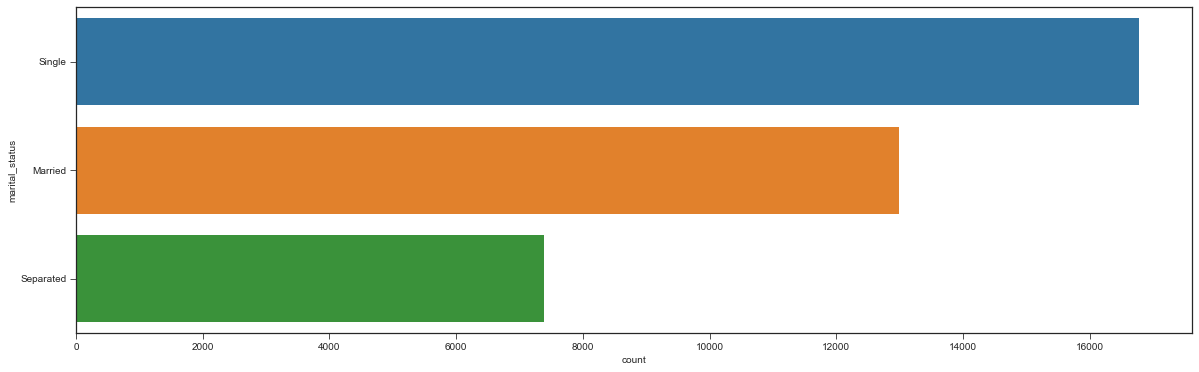

In [14]:
# plot income vs. marital status
df_high_income=df_income[df_income.income==1]
df_low_income=df_income[df_income.income==0]

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=df_high_income)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital_status", data=df_low_income)

The results showed that the married people has more tendency to stay in > 50K. Is it because of joint filling as household income? or just individual filling? This will be a good question to ask.

In [15]:
df_income_married=(df_income.marital_status == 'Married').sum()
df_high_income_married=(df_high_income.marital_status == 'Married').sum()
df_low_income_married=(df_low_income.marital_status== 'Married').sum()
print('high income ratio for married =', df_high_income_married/df_income_married*100)
df_income_single=(df_income.marital_status == 'Single').sum()
df_high_income_single=(df_high_income.marital_status == 'Single').sum()
df_low_income_signle=(df_low_income.marital_status== 'Single').sum()
print('high income ratio for single =', df_high_income_single/df_income_single*100)
df_income_separated=(df_income.marital_status == 'Separated').sum()
df_high_income_separated=(df_high_income.marital_status == 'Separated').sum()
df_low_income_separated=(df_low_income.marital_status== 'Separated').sum()
print('high income ratio for single =', df_high_income_separated/df_income_separated*100)

high income ratio for married = 43.63825724700573
high income ratio for single = 4.882336263113127
high income ratio for single = 9.4328065662134


The ratio confirmed that the single / separated people have a high possibility to be in <= 50K group. Why this is happening? TAX filling, I guess...

The education level should also contribute to the income. According to educational_num, the result should be proportional to the income. Therefore we are investigating the education level vs. income

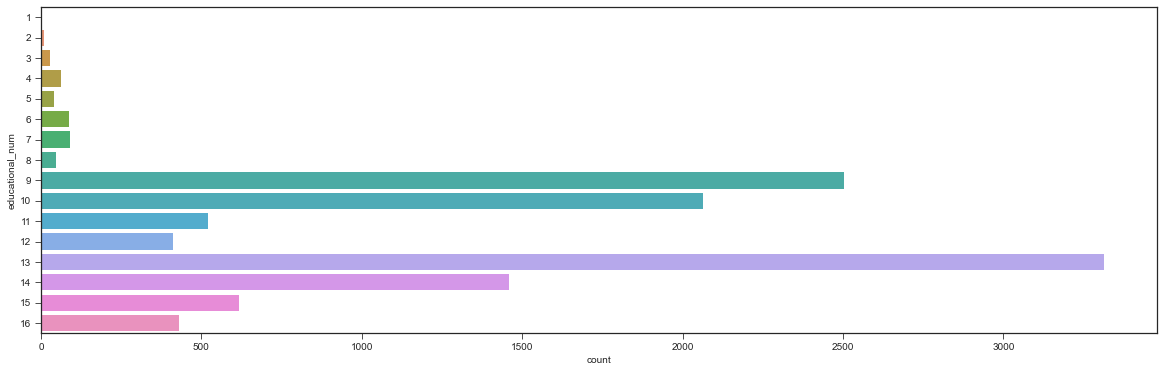

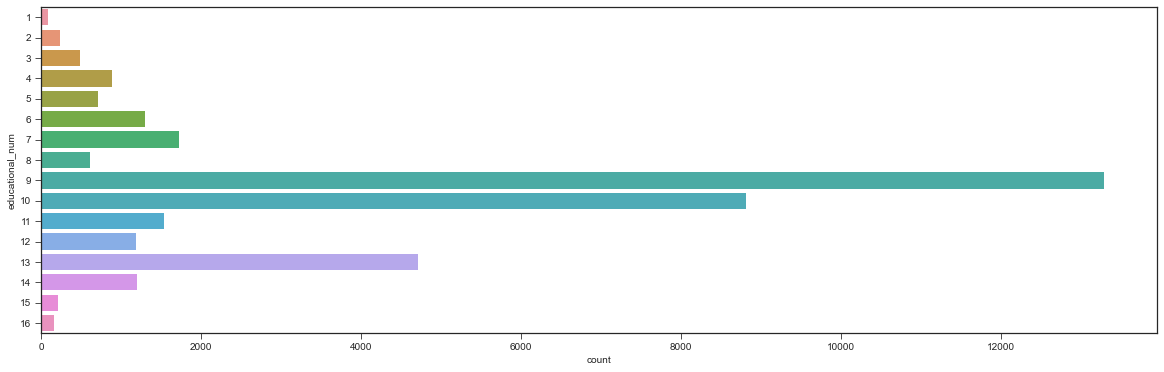

In [16]:
# income vs. education level
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="educational_num", data=df_high_income)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="educational_num", data=df_low_income)

The results showed that the education_num > 13 (bachelor's degree) tend to have a highest income. However the higher education did not seems to contribute to the income. To resolve the issues, we will normalize the results with indiviudal educational_num. 

In [17]:
df_income_edu_num=np.empty(16)
df_high_income_edu_num=np.empty(16)
df_low_income_edu_num=np.empty(16)
ratio=np.empty(16)
edu_year=np.empty(16)

for i in range(16):
    df_income_edu_num[i]=(df_income.educational_num == i+1).sum()
    df_high_income_edu_num[i]=(df_high_income.educational_num == i+1).sum()
    ratio[i]=df_high_income_edu_num[i]/df_income_edu_num[i]*100
    edu_year[i]=i+1
    print('high income ratio for ',year[i], ' years education_num =',df_high_income_edu_num[i]/df_income_edu_num[i]*100)

sns.boxplot(x=edu_year,y=ratio)

NameError: name 'year' is not defined

The results confirmed that based on the analysis, about 72% of high education will likely to get higher income.

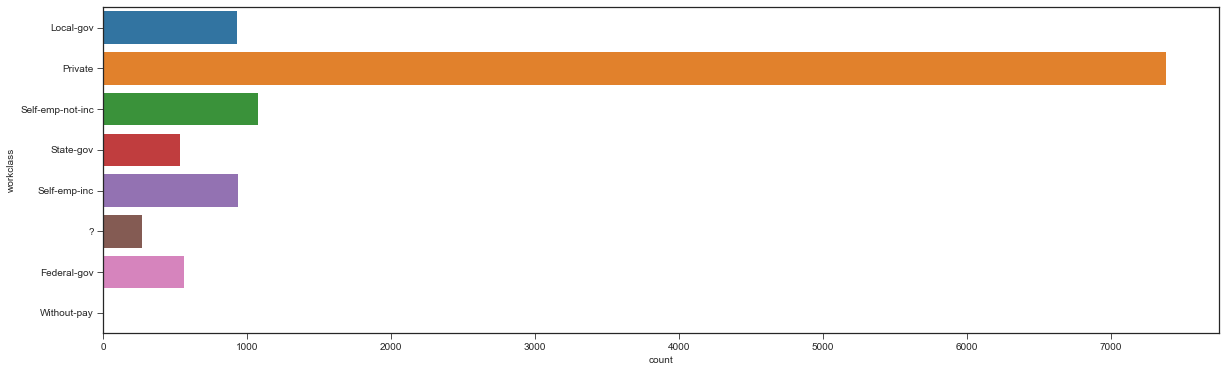

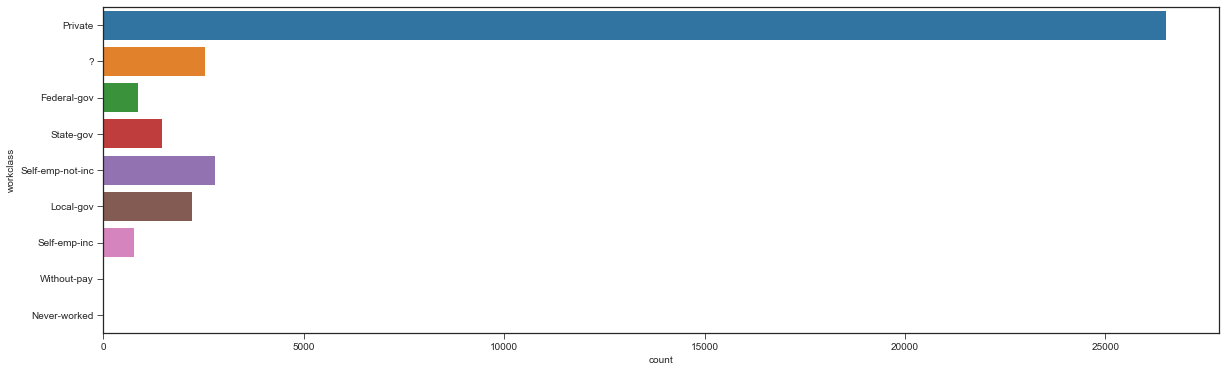

In [18]:
# work class
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="workclass", data=df_high_income)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="workclass", data=df_low_income)

The results are really tricky because it seems like that private sector can offer both high salary and low salary. Why this will happen? Is it because the private sector has more power to do it?

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


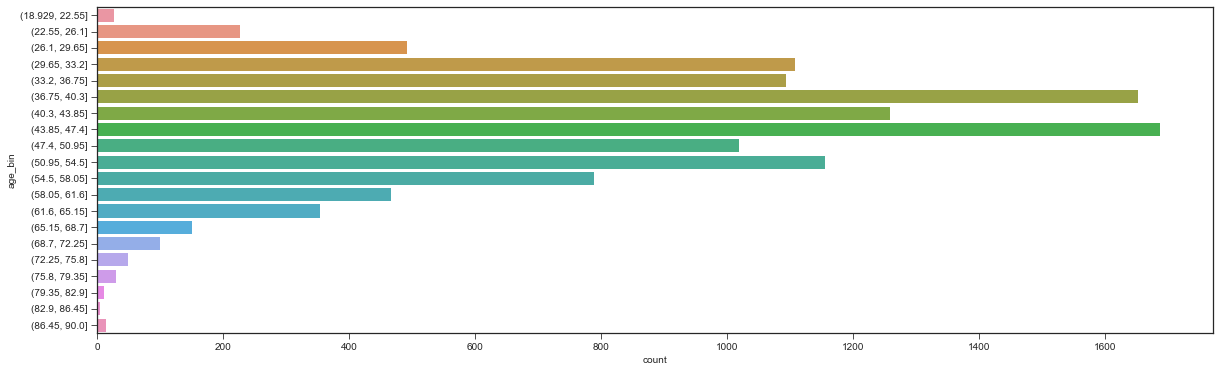

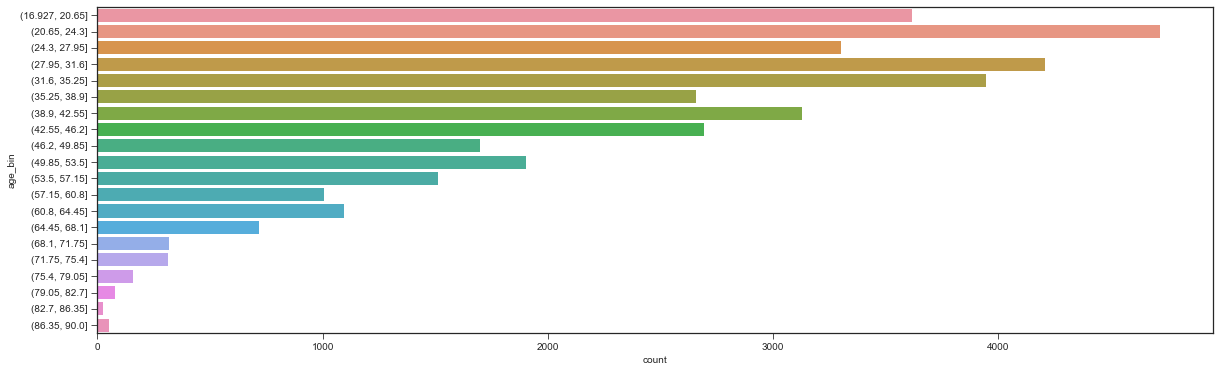

In [19]:
# age vs income
df_high_income['age_bin'] = pd.cut(df_high_income['age'], 20)
df_low_income['age_bin'] = pd.cut(df_low_income['age'], 20)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="age_bin", data=df_high_income)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="age_bin", data=df_low_income)

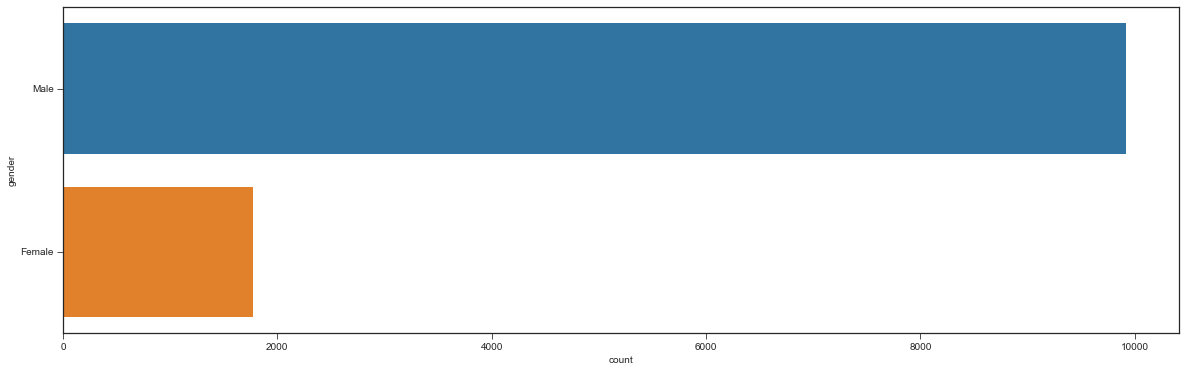

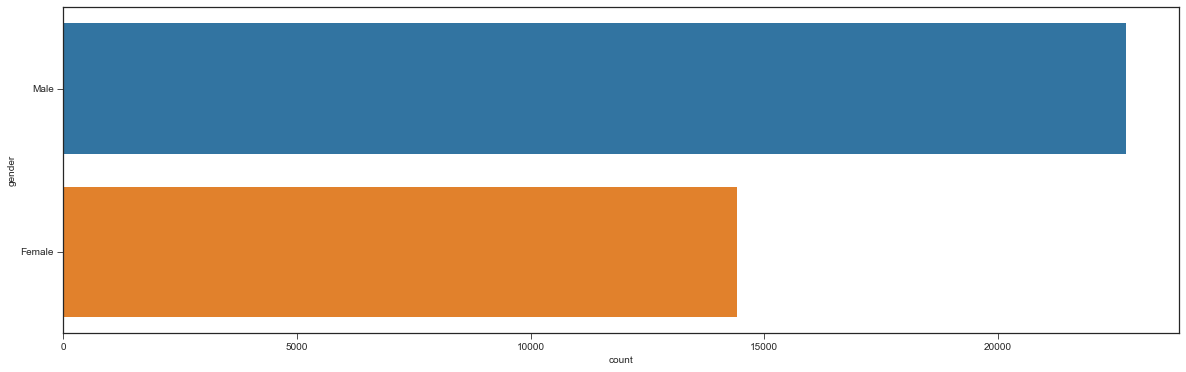

In [20]:
fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="gender", data=df_high_income)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="gender", data=df_low_income)

Results showed that the male tend to have a higher income than female

C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


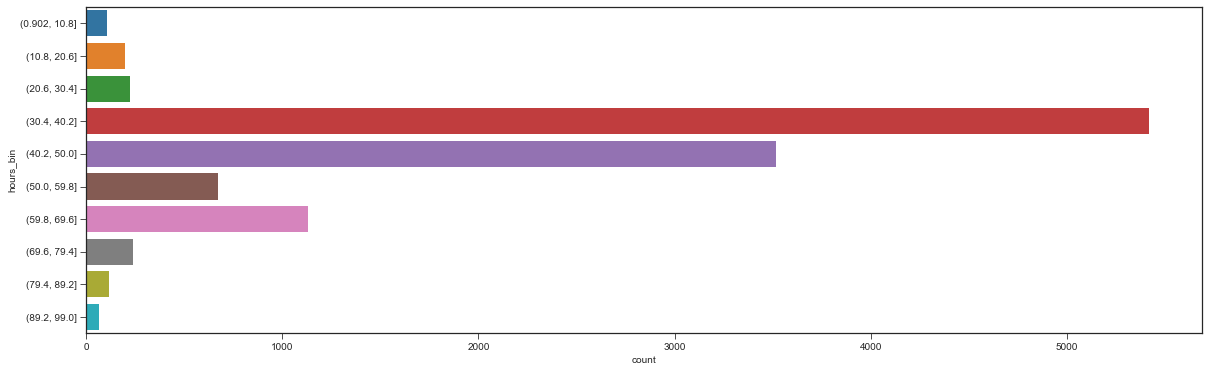

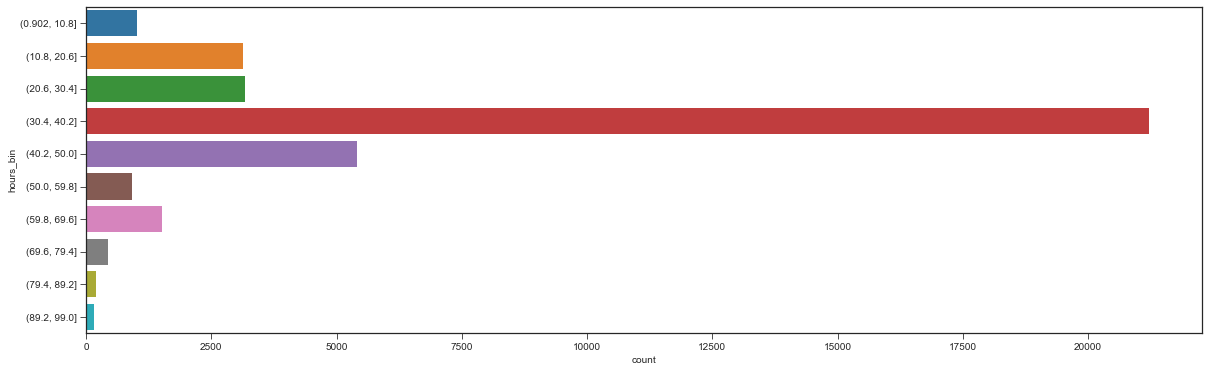

In [21]:
df_high_income['hours_bin'] = pd.cut(df_high_income['hours_per_week'], 10)
df_low_income['hours_bin'] = pd.cut(df_low_income['hours_per_week'], 10)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="hours_bin", data=df_high_income)

fig = plt.figure(figsize=(20,6))
plt.style.use('seaborn-ticks')
sns.countplot(y="hours_bin", data=df_low_income)

The results showed that the high income level tends to work more than 30-40 hours. 

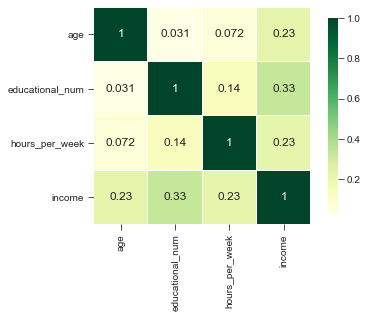

In [22]:
sns.heatmap(df_income.corr(), cmap = "YlGn", square=True, cbar_kws={'shrink':.9 }, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
    

In [23]:
df_income.head()

,age,workclass,educational_num,marital_status,gender,hours_per_week,income
0,25,Private,7,Single,Male,40,0
1,38,Private,9,Married,Male,50,0
2,28,Local-gov,12,Married,Male,40,1
3,44,Private,10,Married,Male,40,1
4,18,?,10,Single,Female,30,0


The heatmap indicated that the income related to the education,age and hours of works. Now let's setup a model to simulate the process. We will use DecisionTree. There are six features in the df_income, exclude the output income. Three of them were categorical features. Therefore we need to have dummy values for these three

In [47]:
# import ML package
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



# import train/test split
from sklearn.model_selection import train_test_split

# import scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

df_income_ML=df_income.drop('income',axis=1)

In [48]:
df_income_ML=pd.get_dummies(df_income_ML)
X=df_income_ML
y=income
X.head()

,age,educational_num,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married,marital_status_Separated,marital_status_Single,gender_Female,gender_Male
0,25,7,40,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,38,9,50,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,28,12,40,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,44,10,40,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4,18,10,30,1,0,0,0,0,0,0,0,0,0,0,1,1,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


C:\Users\mohua\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mohua\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [51]:
param_grid = {'n_estimators':np.arange(1,10)}
RLModel = RandomForestClassifier()
RLModel_cv= GridSearchCV(RLModel,param_grid,cv=3)
model_res1=RLModel_cv.fit(X_train_scaled,y_train)
y_pred = model_res1.predict(X_test_scaled)
y_pred_prob = model_res1.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(RLModel_cv)
RLModel_cv.best_params_

Random Forest: Accuracy=0.803
Random Forest: f1-score=0.797
GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


{'n_estimators': 8}

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=8, random_state = 1234,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.803
Random Forest: f1-score=0.796


17


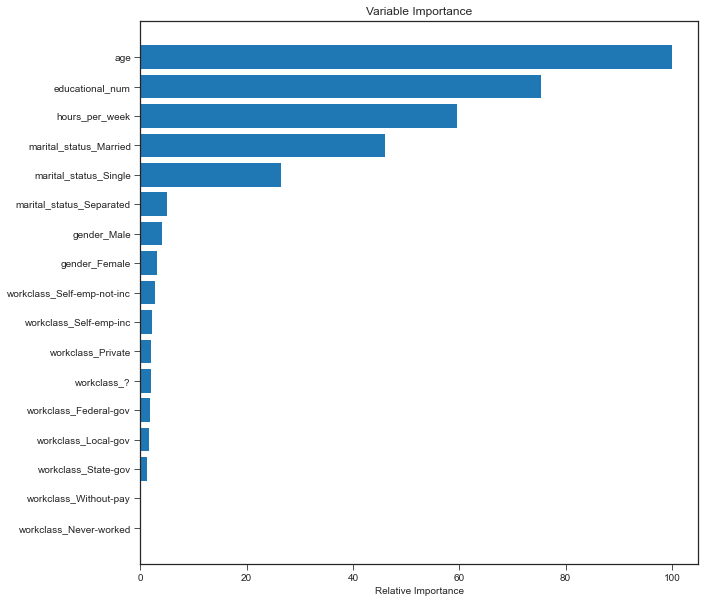

In [54]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
# importance of features
# RM model: thal > thalach > cp > ca > age > chol > oldpeak > tresbps > exang > sex > slope > restecg > fbs

The results showed that age, education and hours per weeks are the most important features to the income

# Summary: During this project, we investigated the potential factors that will affect income. The results showed that age, education and hours per weeks are the most important factor. Additional work can be done by generating simulation plot with this model.